In [1]:
#Import all the libraries necessary to this research

# Statistical Analysis
import statsmodels.api as stats
import statsmodels.formula.api as stats_f

#Data Preparation and Analysis
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline
import seaborn as sns
from yellowbrick.regressor import PredictionError, ResidualsPlot


# Machine Learning and Model Analysis
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_predict, train_test_split

# Disable Warnings
from warnings import filterwarnings

In [2]:
filterwarnings('ignore') 

In [3]:
churn_data = pd.read_csv('churn_clean.csv')
pd.options.display.max_columns = None

churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# PART I: RESEARCH QUESTION


# A1. RESEARCH QUESTION
Which indicators are associated with predicting a customer's longevity as a subscriber with a network provider?

# A2. GOALS
 
The objectives of this analysis are:

 - To utilize the entire dataset and determine the length of time customers remain subscribed to a provider (i.e., Tenure).
 - To meticulously evaluate and analyze all attributes to identify which ones are crucial to addressing the research question by performing essential analytical calculations.
 - To construct a predictive model using these identified attributes to assist stakeholders in making informed decisions on how to enhance customer tenure and potentially decrease customer churn.
 
 
 # PART II. METHOD JUSTIFICATION



# B1. SUMMARY OF ASSUMPTIONS

According to Sigma Coding (2019), four primary assumptions associated with the multiple regression model are:

- Homoscedasticity, where the residuals of the multiple regression model remain constant along the regression line.
- No presence of multicollinearity between independent variables.
- No occurrence of autocorrelation in the provided data, which implies that the residuals should be uniformly random without any pattern.
- The existence of a linear relationship between the predictor and response variables.



# B2. TOOL BENEFITS

To produce visual representations of the data analysis by combining code and text reports, I will utilize Jupyter Notebook which will be executed using Python. I chose Python for the following reasons:  
- Because of its robustness in analyzing and summarizing data.
- Python is also equipped with various libraries that enhance its functionality, save time, and reduce code complexity. 


Some of the libraries that are beneficial for this project include:

- Pandas, which facilitates the manipulation and analysis of data in rows and columns.
- Numpy, which enables the definition of arrays and complex matrices of all forms.
- Filterwarnings, which helps to ignore warning messages and enhances readability.
- Matplotlib, Yellowbrick, and Seaborn, which are used to create data visualizations.
- Statsmodels and Scikit-learn, which enable the development of statistical and predictive models.



# B3. APPROPRIATE TECHNIQUE

In my research, I will be focusing on the "Tenure" attribute. According to the data dictionary, Tenure represents the number of months that a customer has been subscribed to a network provider. As Tenure is a continuous attribute, it is a great fit for the linear regression model, which can be used to predict quantitative variables. The research question mentioned in answer A1 pertains to the examination of customer tenure duration. To address this research question, multiple regression is a suitable technique as it will allow me to create a comprehensive model using appropriate data types and most of the variables in the dataset. This model will assist the hospitals in predicting and increasing the length of time a customer stays subscribed to a network provider.



# PART III. DATA PREPARATION


# C1. DATA CLEANING


The data cleaning objectives for my research include:

- Delivering only numerical attributes that align with a multiple regression model to the model.
- Converting all binary (yes/no) columns to 1 and 0, so 1 represents "yes," and 0 represents "no."
- Removing columns with unique customer identifiers.
- Eliminating string columns that are not categorical in nature.
- Applying one-hot encoding to categorical data columns. This technique transforms these variables into categorical columns, each containing dummy variables with binary values (Massaron & Boschetti, 2016).


# C2. SUMMARY STATISTICS

- In Answer C3, Step 1, the dataset's summary statistics are presented using the pandas .describe() method. This provides statistical information, such as the count, mean, minimum and maximum values, standard deviation, etc., for each continuous attribute (for both the predictor and target variables) in the dataset.

- The provided dataset includes several attributes that are either already numeric or can be transformed into useful numeric equivalents to assist in predicting the outcome.

- The target variable for this research question is the Tenure attribute, which has a count of 10,000, a mean of 34.53, a standard deviation of 26.44, a maximum value of 72.0, and a minimum value of 1.00. The first quartile range is 7.92, the interquartile range is 35.43, and the third quartile range is 61.48.

- There are 55 predictor variables in total, including all numerical attributes, binary columns, and categorical values that are one hot encoded. Their summary statistics are also provided in Answer C3, Step 1.

- The information for both the independent and dependent attributes, as well as their data types, is clearly stated in Answer D1 after data preparation.

- A total of 9 attributes are dropped, namely TimeZone, Customer_id, Interaction, Job, CaseOrder, UID, City, State, and County variables. These attributes are either string variables with no use to the model or contain too many values for reasonable splitting (one hot encoding).

- The final model's summary statistics will include the R squared value and p value. The R squared value measures how well the regression model fits the data, while the p value indicates if the hypothesis test results are statistically significant, as discussed in Shubham Agrawal's work (2018).

# 




# C3. VISUALIZATIONS

# BIVARIATE VISUALIZATION

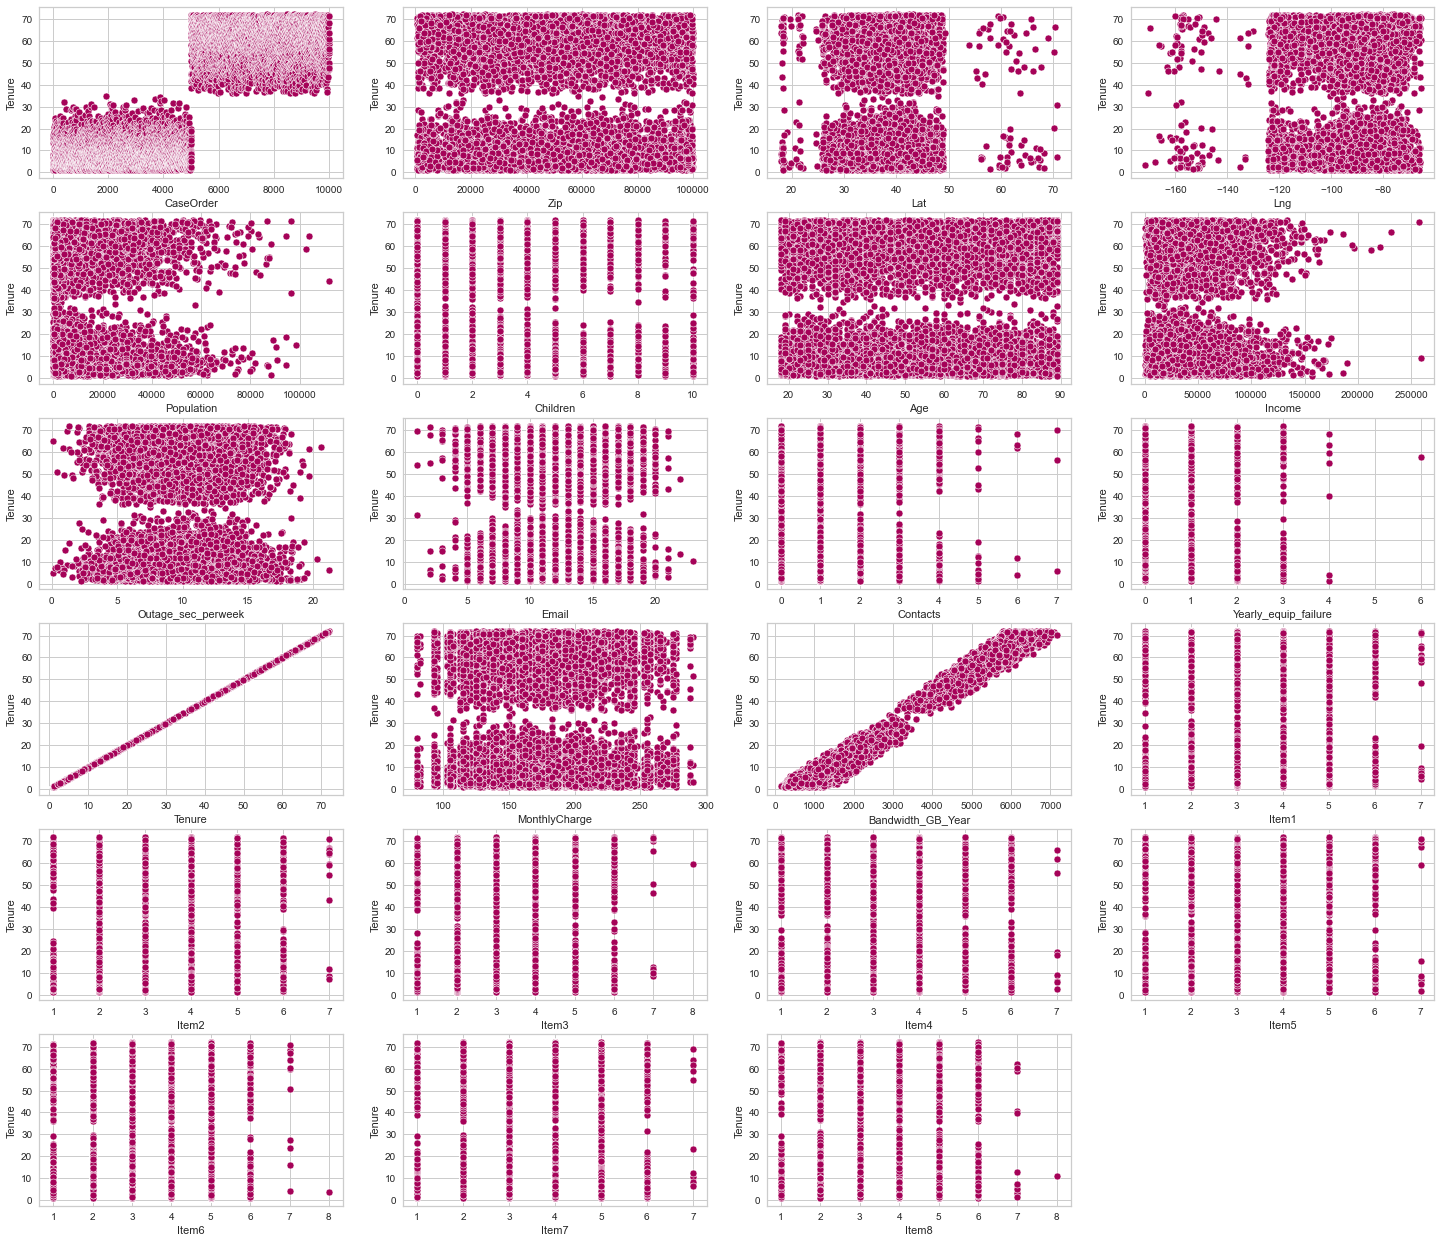

In [4]:
# Generate scatter plots where the Tenure attribute is plotted on the y-axis and each independent numerical attribute is plotted on the x-axis.
# Reference: H4

v=1

plt.subplots(figsize=(25, 75))
for i in churn_data.select_dtypes(include='number').columns:
    plt.subplot(20,4,v)
    sns.scatterplot(churn_data[i], churn_data['Tenure'], color='m')
    v+=1
    
plt.show()

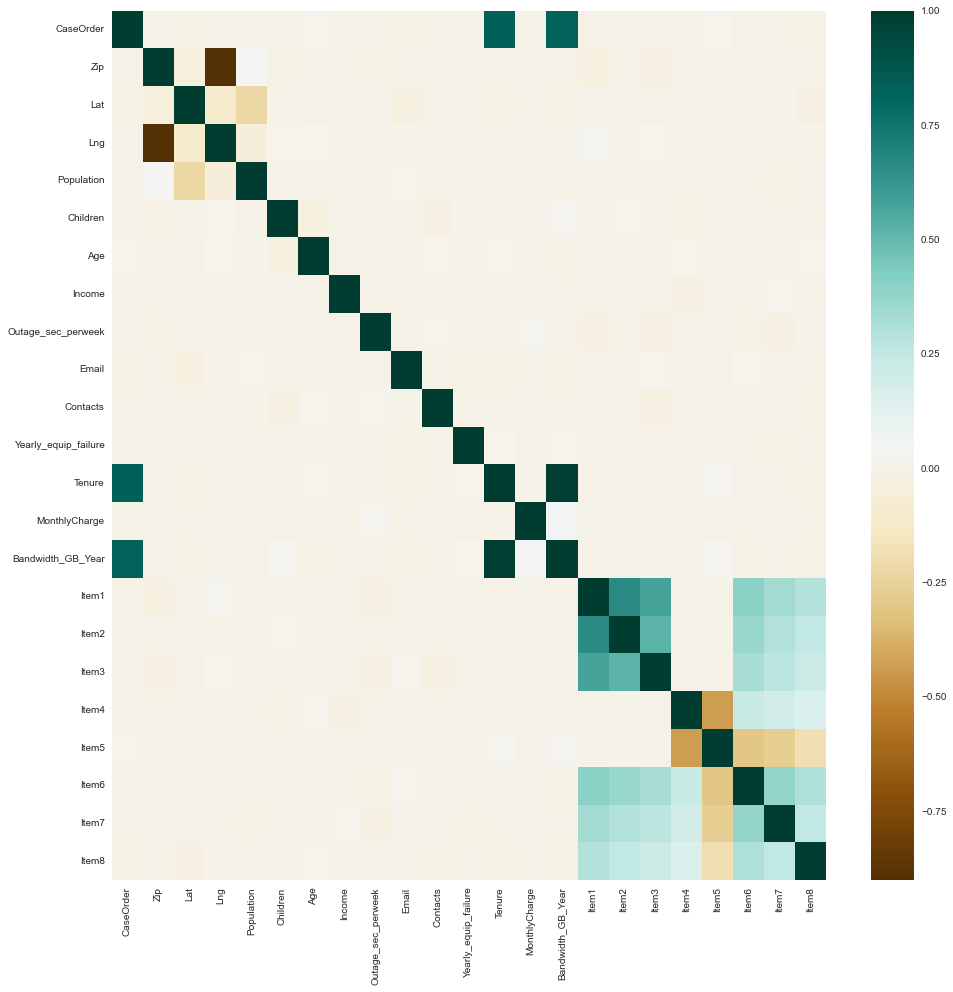

In [5]:
# Generate heatmap and highlight Tenure attribute.
# Reference: H4

loc = churn_data.columns.get_loc('Tenure')
length = len(churn_data.columns)

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(churn_data.corr(), cmap='BrBG')

ax.add_patch(Rectangle((loc, 0), 1, length, fill=False, lw=4, edgecolor='m'))
ax.add_patch(Rectangle((0, loc), length, 1, fill=False, lw=4, edgecolor='m'))
plt.show()

#  
















#  UNIVARIATE VISUALIZATION

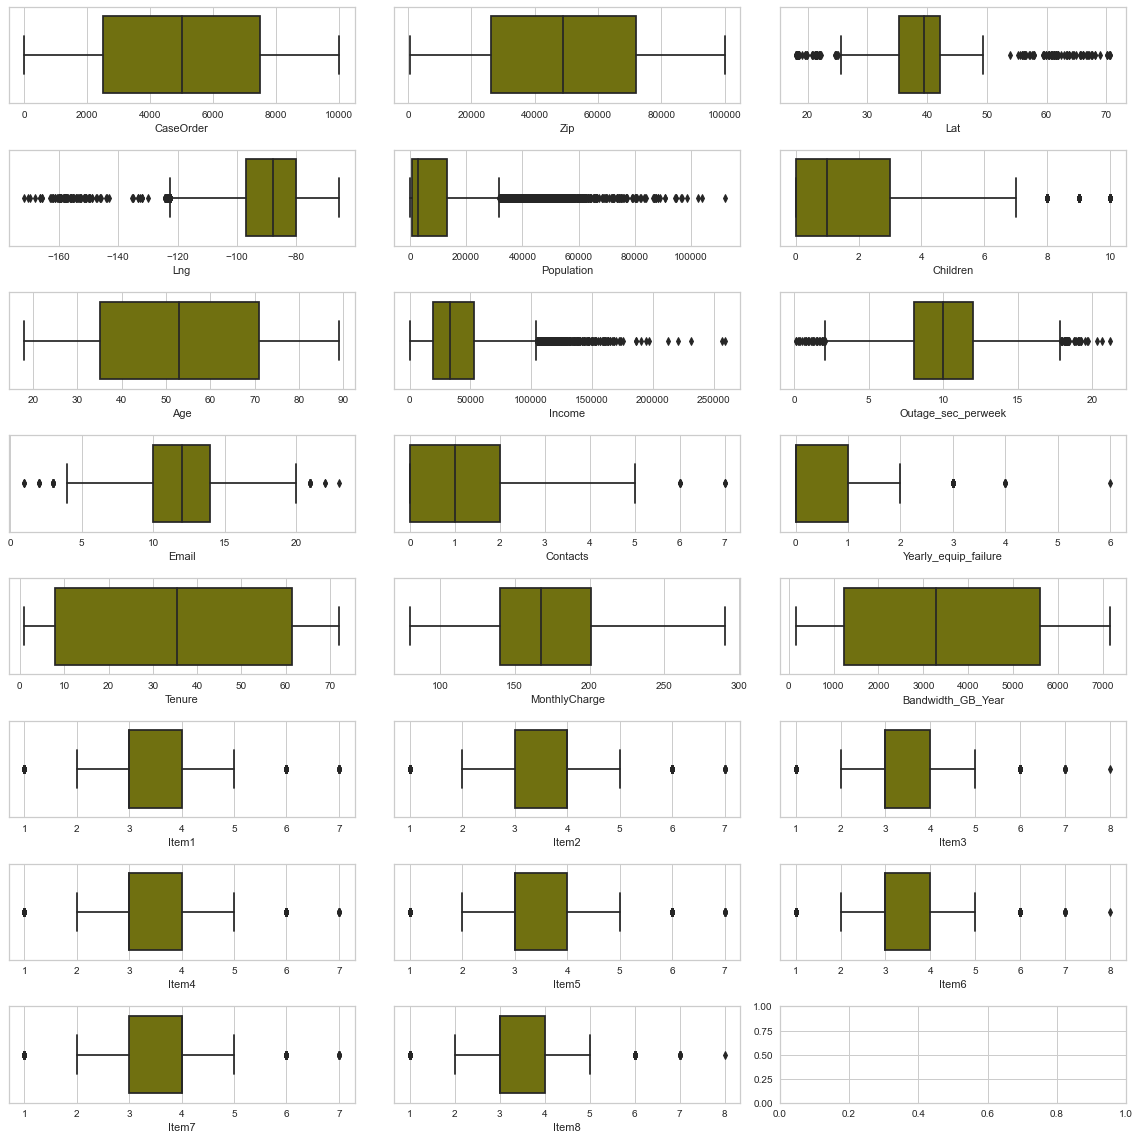

In [6]:
# Boxplot of all the numeric columns
# Reference: H6

cols = list(churn_data.select_dtypes(include='number').columns)

fig, ax = plt.subplots(round(len(cols)/3), 3, figsize=(16,16)) 
v = 0;
for col in cols:
    m, n = divmod(v, 3)
    sns.boxplot(x=churn_data[col], ax=ax[m, n], color='olive')
    v += 1
plt.tight_layout()
plt.show();

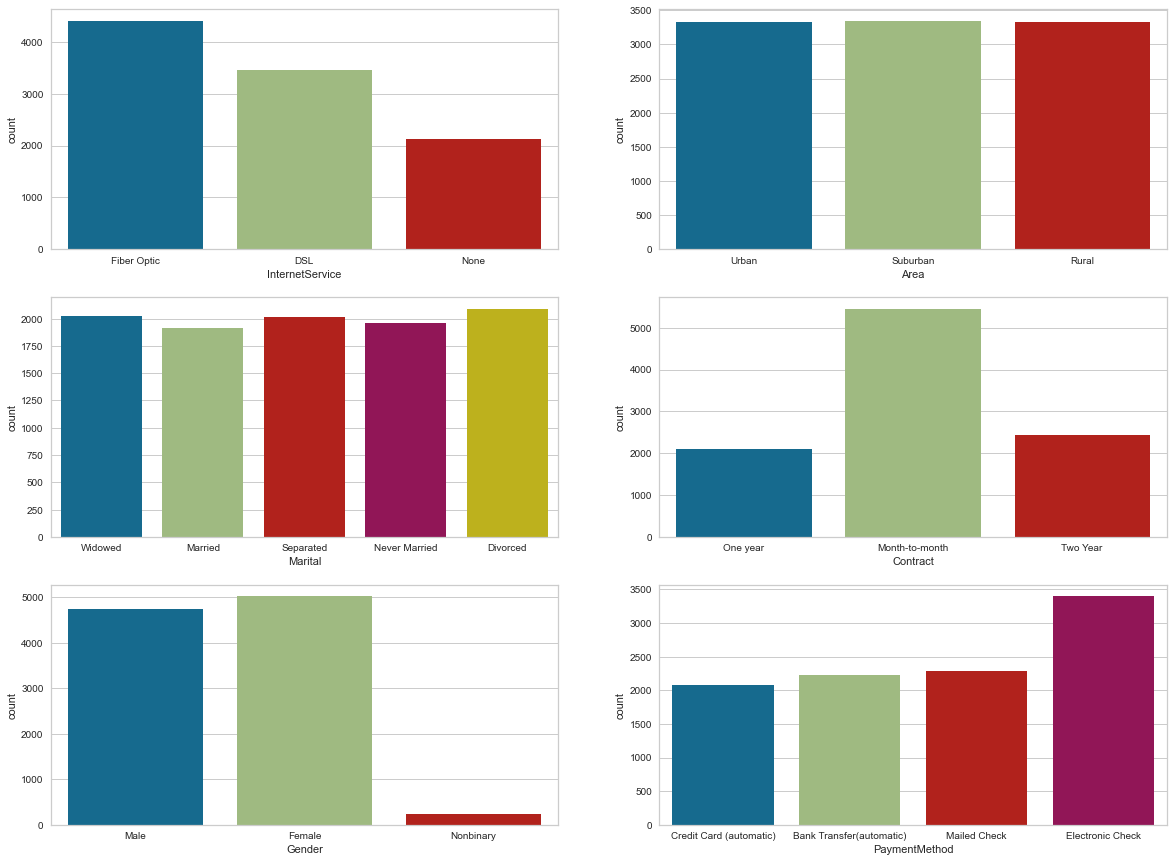

In [7]:
# Visualize bar plots for attributes with categorical values. 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

columns = ['InternetService', 'Area', 'Marital', 'Contract', 'Gender', 'PaymentMethod']

for i, col in enumerate(columns):
    if i < 6:
        plt.subplot(3, 2, i+1)
        sns.countplot(data=churn_data, x=col)
    else:
        plt.subplot(3, 2, i+2)
        sns.countplot(data=churn_data, x=col)

plt.show()

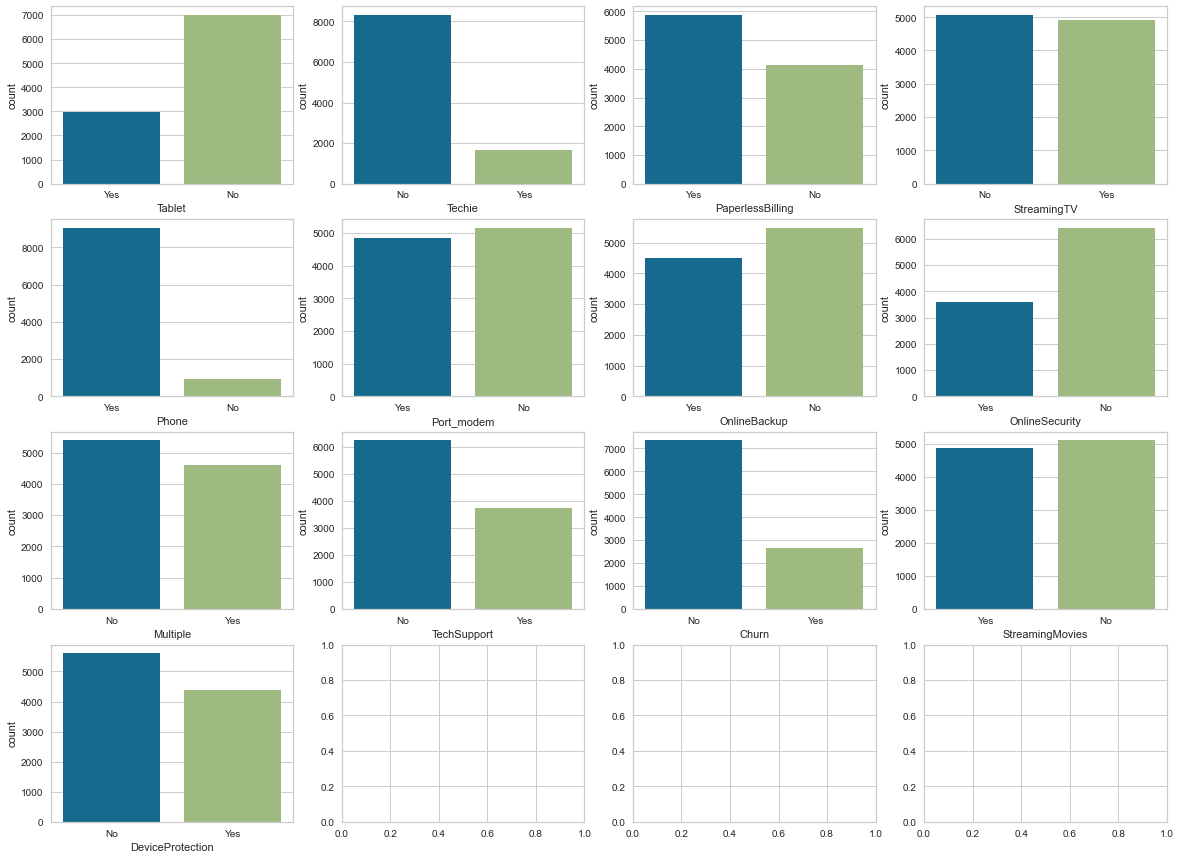

In [8]:
# Visualize bar plots for attributes variables with no/yes values. 

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,15))

columns = ['Tablet', 'Techie', 'PaperlessBilling', 'StreamingTV', 'Phone', 'Port_modem',
           'OnlineBackup', 'OnlineSecurity', 'Multiple', 'TechSupport', 'Churn', 'StreamingMovies', 'DeviceProtection']

for i, col in enumerate(columns):
    if i < 13:
        plt.subplot(4, 4, i+1)
        sns.countplot(data=churn_data, x=col)
    else:
        plt.subplot(4, 4, i+2)
        sns.countplot(data=churn_data, x=col)

plt.show()

#  




# C4. DATA TRANSFORMATION.            

The steps I will be using in preprocessing the data are:
 
 - Step 1:  Assess the summary statistics of the dataset to gain an understanding of its distribution and characteristics.
 - Step 2:	Examine the data types of all attributes and identify which ones will require further analysis.
 - Step 3:	Convert binary variables from "Yes" and "No" to “1” and “0” for consistency in the data.
 - Step 4:	Analyze all potential discrete attributes using bar charts.
 - Step 5:	One-hot encode these potential discrete attributes to enable their use in the regression analysis.
 - Step 6:	Remove all columns that are unlikely to contribute significantly to the regression analysis.

# Step 1

In [9]:
churn_data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


# Step 2

In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

# Step 3

In [11]:
# Reference: H2

categorical_cols = ['Churn', 'TechSupport', 'Techie',  'StreamingTV', 'Multiple', 'Port_modem',  'DeviceProtection',  
                    'OnlineSecurity', 'Phone', 'StreamingMovies', 'PaperlessBilling', 'Tablet',  'OnlineBackup']

churn_data[categorical_cols] = churn_data[categorical_cols].replace(to_replace = ['Yes', 'No'], value = [1, 0])

In [12]:
churn_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,0,7.978323,10,0,1,0,One year,1,1,Fiber Optic,1,0,1,1,0,0,0,1,1,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,1,11.699080,12,0,1,1,Month-to-month,0,1,Fiber Optic,1,1,1,0,0,0,1,1,1,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,0,10.752800,9,0,1,1,Two Year,1,0,DSL,1,1,0,0,0,0,0,1,1,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,0,14.913540,15,2,0,1,Two Year,0,0,DSL,1,0,1,0,0,0,1,0,1,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,1,8.147417,16,2,1,0,Month-to-month,1,0,Fiber Optic,0,0,0,0,0,1,1,0,0,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


# Step 4

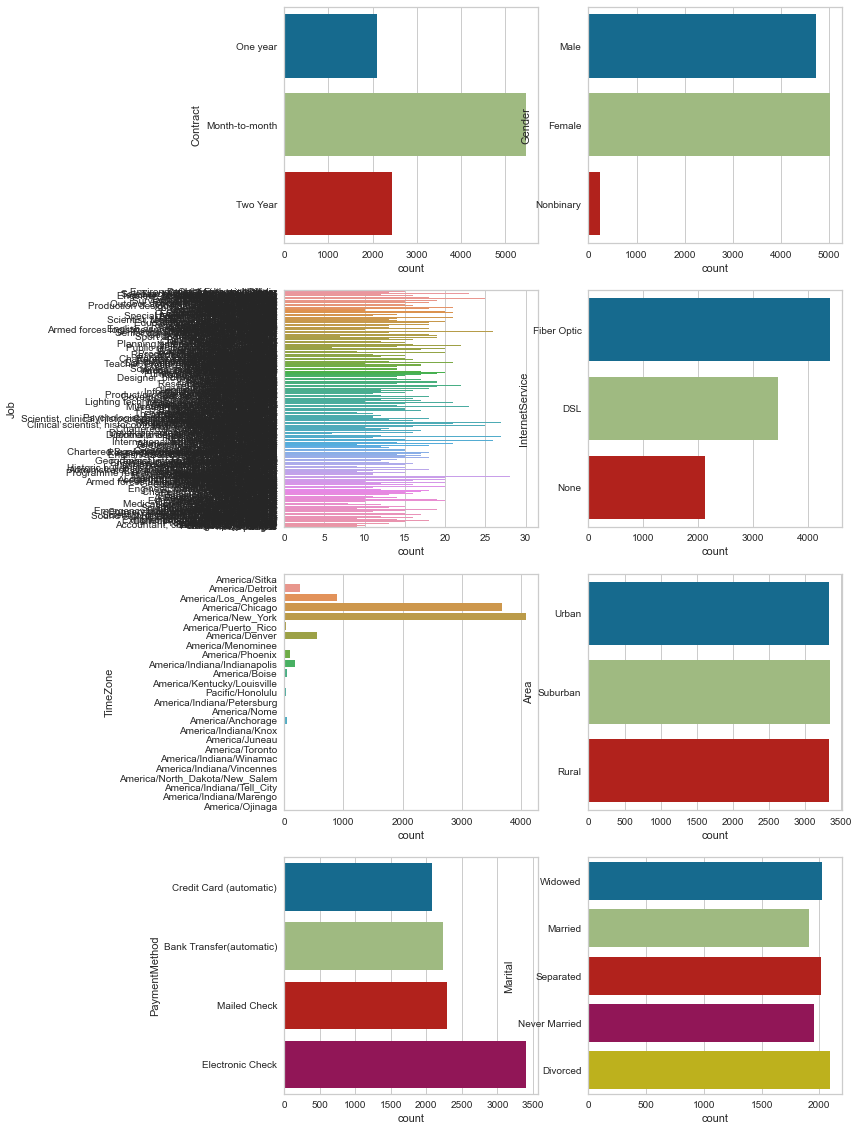

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

columns = ['Contract', 'Gender', 'Job', 'InternetService', 'TimeZone', 'Area', 'PaymentMethod', 'Marital']

for i, col in enumerate(columns):
    if i < 8:
        plt.subplot(4, 2, i+1)
        sns.countplot(data=churn_data, y=col)
    else:
        plt.subplot(4, 2, i+2)
        sns.countplot(data=churn_data, y=col)

plt.show()

Based on the above visualization, it appears that the Timezone and Job attributes have multiple potential categories that could be separated. On the other hand, the remaining categorical attributes meet our criteria and will be subjected to one hot encoding.

# Step 5

In [14]:
# Generate individual variables for each categorical attribute, assigning 0 to rows where the value is absent and 
# 1 where it is present.

churn_data = pd.get_dummies(data=churn_data, columns=['Marital', 'Area', 'Gender', 'InternetService', 
                                                    'PaymentMethod', 'Contract'])

# Step 6

In [15]:
columns = ['County', 'Interaction', 'Job', 'UID', 'CaseOrder', 'State', 'City', 'Customer_id', 'TimeZone']

churn_data = churn_data.drop(columns, axis = 1)
churn_data.head()

,Zip,Lat,Lng,Population,Children,Age,Income,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Area_Rural,Area_Suburban,Area_Urban,Gender_Female,Gender_Male,Gender_Nonbinary,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,PaymentMethod_Bank Transfer(automatic),PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check,Contract_Month-to-month,Contract_One year,Contract_Two Year
0,99927,56.25100,-133.37571,38,0,68,28561.99,0,7.978323,10,0,1,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
1,48661,44.32893,-84.24080,10446,1,27,21704.77,1,11.699080,12,0,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
2,97148,45.35589,-123.24657,3735,4,50,9609.57,0,10.752800,9,0,1,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
3,92014,32.96687,-117.24798,13863,1,48,18925.23,0,14.913540,15,2,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1
4,77461,29.38012,-95.80673,11352,0,83,40074.19,1,8.147417,16,2,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0


#  




# C5. PREPARED DATA SET

In [16]:
# Reference: H3

churn_data.to_csv('churn_clean_data_final.csv', index = False, encoding = 'utf-8')

# PART IV: MODEL COMPARISON AND ANALYSIS

# D1. INITIAL MODEL

In [17]:
x_attr = list(churn_data.drop(['Tenure'], axis = 1).columns)
x_attr

['Zip',
 'Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Churn',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Techie',
 'Port_modem',
 'Tablet',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharge',
 'Bandwidth_GB_Year',
 'Item1',
 'Item2',
 'Item3',
 'Item4',
 'Item5',
 'Item6',
 'Item7',
 'Item8',
 'Marital_Divorced',
 'Marital_Married',
 'Marital_Never Married',
 'Marital_Separated',
 'Marital_Widowed',
 'Area_Rural',
 'Area_Suburban',
 'Area_Urban',
 'Gender_Female',
 'Gender_Male',
 'Gender_Nonbinary',
 'InternetService_DSL',
 'InternetService_Fiber Optic',
 'InternetService_None',
 'PaymentMethod_Bank Transfer(automatic)',
 'PaymentMethod_Credit Card (automatic)',
 'PaymentMethod_Electronic Check',
 'PaymentMethod_Mailed Check',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two Year']

In [18]:
churn_data[x_attr].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Zip                                     10000 non-null  int64  
 1   Lat                                     10000 non-null  float64
 2   Lng                                     10000 non-null  float64
 3   Population                              10000 non-null  int64  
 4   Children                                10000 non-null  int64  
 5   Age                                     10000 non-null  int64  
 6   Income                                  10000 non-null  float64
 7   Churn                                   10000 non-null  int64  
 8   Outage_sec_perweek                      10000 non-null  float64
 9   Email                                   10000 non-null  int64  
 10  Contacts                                10000 non-null  int

In [19]:
print('There are a total of ', len(x_attr), ' dependent attributes ')

There are a total of  55  dependent attributes 


In [20]:
y_attr = list(churn_data.drop(x_attr, axis = 1).columns)
y_attr

['Tenure']

In [21]:
churn_data[y_attr].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tenure  10000 non-null  float64
dtypes: float64(1)
memory usage: 78.2 KB


In [22]:
y = churn_data['Tenure'].values
X = churn_data.drop(y_attr, axis = 1)

ind = X.columns
dep = len(X)

print(X)
print(y)

        Zip       Lat        Lng  Population  Children  Age    Income  Churn  \
0     99927  56.25100 -133.37571          38         0   68  28561.99      0   
1     48661  44.32893  -84.24080       10446         1   27  21704.77      1   
2     97148  45.35589 -123.24657        3735         4   50   9609.57      0   
3     92014  32.96687 -117.24798       13863         1   48  18925.23      0   
4     77461  29.38012  -95.80673       11352         0   83  40074.19      1   
...     ...       ...        ...         ...       ...  ...       ...    ...   
9995   5758  43.43391  -72.78734         640         3   23  55723.74      0   
9996  37042  36.56907  -87.41694       77168         4   48  34129.34      0   
9997  79061  35.52039 -100.44180         406         1   48  45983.43      0   
9998  30117  33.58016  -85.13241       35575         1   39  16667.58      0   
9999  30523  34.70783  -83.53648       12230         1   28   9020.92      0   

      Outage_sec_perweek  Email  Contac

In [23]:
print ("The initial model is made up of", X.shape[1], " Idependent attributes and ", len(y.shape), " Dependent attribute")

The initial model is made up of 55  Idependent attributes and  1  Dependent attribute


In [24]:
l_reg = LinearRegression()
l_reg.fit(X,y)
l_reg.feature_names_in_

array(['Zip', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income',
       'Churn', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone',
       'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1',
       'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',
       'Marital_Divorced', 'Marital_Married', 'Marital_Never Married',
       'Marital_Separated', 'Marital_Widowed', 'Area_Rural',
       'Area_Suburban', 'Area_Urban', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'InternetService_DSL',
       'InternetService_Fiber Optic', 'InternetService_None',
       'PaymentMethod_Bank Transfer(automatic)',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check',
       'Contract_Month-to-month', 'Contra

In [25]:
const_X = stats.add_constant(X)
multi_reg = stats.OLS(y,const_X)
model_a = multi_reg.fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.235e+07
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        06:20:48   Log-Likelihood:                 8140.5
No. Observations:               10000   AIC:                        -1.618e+04
Df Residuals:                    9950   BIC:                        -1.582e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2023      0.007    -27.486      0.000      -0.217      -0.188
Zip                                     3.572e-08   9.55e-08      0.374      0.708   -1.51e-07    2.23e-07
Lat                                    -5.718e-06      0.000     -0.026      0.979      -0.000       0.000
Lng                                     6.505e-05      0.000      0.373      0.709      -0.000       0.000
Population                             -7.859e-08   7.69e-08     -1.022      0.307   -2.29e-07    7.21e-08
Children                                  -0.3755      0.001   -748.152      0.000      -0.377      -0.375
Age                                        0.0400   5.21e-05    768.092      0.000       0.040       0.040
Income                                  1.564e-08   3.82e-08      0.410      0.682   -5.92e-08    9.05e-08
Churn                                      0.0019      0.003      0.568      0.570      -0.005       0.009
Outage_sec_perweek                         0.0003      0.000      0.814      0.416      -0.000       0.001
Email                                  -6.743e-05      0.000     -0.189      0.850      -0.001       0.001
Contacts                                  -0.0006      0.001     -0.548      0.584      -0.003       0.002
Yearly_equip_failure                       0.0002      0.002      0.109      0.913      -0.003       0.004
Techie                                  5.806e-06      0.003      0.002      0.998      -0.006       0.006
Port_modem                                 0.0027      0.002      1.237      0.216      -0.002       0.007
Tablet                                     0.0006      0.002      0.269      0.788      -0.004       0.005
Phone                                      0.0017      0.004      0.458      0.647      -0.006       0.009
Multiple                                   0.2684      0.005     59.111      0.000       0.260       0.277
OnlineSecurity                            -0.8312      0.002   -365.711      0.000      -0.836      -0.827
OnlineBackup                              -0.3552      0.004   -101.094      0.000      -0.362      -0.348
DeviceProtection                          -0.5971      0.003   -224.555      0.000      -0.602      -0.592
TechSupport                                0.3850      0.003    142.163      0.000       0.380       0.390
StreamingTV                               -1.2984      0.006   -231.936      0.000      -1.309      -1.287
StreamingMovies                           -0.7227      0.007   -106.915      0.000      -0.736      -0.709
PaperlessBilling                          -0.0037      0.002     -1.677      0.094      -0.008       0.001
MonthlyCharge                             -0.0352      0.000   -284.873      0.000     

# D2. JUSTIFICATION OF MODEL REDUCTION

Based on the course material, having many attributes may lead to inflation of the R squared value (Massaron & Boschetti, 2016). In the model summary above, an R squared value of 1 was obtained, which is the highest possible value and may result in an overfit model. High multicollinearity between attributes can be detected by a high condition number. Additionally, some attributes in the summary above have a p-value greater than 0.05, indicating that they are not significant to the model and should be removed. These attributes include Zip, Lat, Lng, Population, Income, Churn, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, Techie, Port_modem, Tablet, Phone, PaperlessBilling, Item1, Item2, Item3, Item4, Item5, Item6, Item7, and Item8.

In [26]:
columns =['Zip', 'Lat', 'Lng', 'Population', 'Income', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
          'Yearly_equip_failure', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'PaperlessBilling', 
         'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']

new_X = X.drop(columns, axis = 1)

In [27]:
const_X2 = stats.add_constant(new_X)

multi_reg = stats.OLS(y,const_X2)
model_b = multi_reg.fit()
model_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.330e+07
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        06:20:48   Log-Likelihood:                 8134.2
No. Observations:               10000   AIC:                        -1.621e+04
Df Residuals:                    9973   BIC:                        -1.602e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2027      0.004    -48.827      0.000      -0.211      -0.195
Children                                  -0.3755      0.001   -749.432      0.000      -0.376      -0.375
Age                                        0.0400    5.2e-05    769.096      0.000       0.040       0.040
Multiple                                   0.2687      0.005     59.292      0.000       0.260       0.278
OnlineSecurity                            -0.8312      0.002   -366.495      0.000      -0.836      -0.827
OnlineBackup                              -0.3553      0.004   -101.353      0.000      -0.362      -0.348
DeviceProtection                          -0.5971      0.003   -225.009      0.000      -0.602      -0.592
TechSupport                                0.3852      0.003    142.628      0.000       0.380       0.390
StreamingTV                               -1.2980      0.006   -232.290      0.000      -1.309      -1.287
StreamingMovies                           -0.7223      0.007   -107.043      0.000      -0.736      -0.709
MonthlyCharge                             -0.0352      0.000   -287.982      0.000      -0.035      -0.035
Bandwidth_GB_Year                          0.0122   4.97e-07   2.46e+04      0.000       0.012       0.012
Marital_Divorced                          -0.0407      0.002    -17.874      0.000      -0.045      -0.036
Marital_Married                           -0.0413      0.002    -17.607      0.000      -0.046      -0.037
Marital_Never Married                     -0.0420      0.002    -18.126      0.000      -0.047      -0.037
Marital_Separated                         -0.0380      0.002    -16.491      0.000      -0.042      -0.033
Marital_Widowed                           -0.0408      0.002    -17.825      0.000      -0.045      -0.036
Area_Rural                                -0.0641      0.002    -31.234      0.000      -0.068      -0.060
Area_Suburban                             -0.0710      0.002    -34.571      0.000      -0.075      -0.067
Area_Urban                                -0.0675      0.002    -32.796      0.000      -0.072      -0.064
Gender_Female                              0.1092      0.003     39.539      0.000       0.104       0.115
Gender_Male                               -0.6831      0.003   -247.158      0.000      -0.689      -0.678
Gender_Nonbinary                           0.3712      0.005     71.410      0.000       0.361       0.381
InternetService_DSL                       -3.5190      0.002  -1827.076      0.000      -3.523      -3.515
InternetService_Fiber Optic                2.2349      0.004    599.110      0.000       2.228       2.242
InternetService_None                       1.0814      0.002    549.195      0.000     

# 


A glance at the model summary above shows that the R squared value is at 1, and all attributes have a p-value of 0. However, the model still has a high condition number, which suggests the possibility of multicollinearity. To explore this, we will examine the correlation between the remaining attributes using a heatmap.

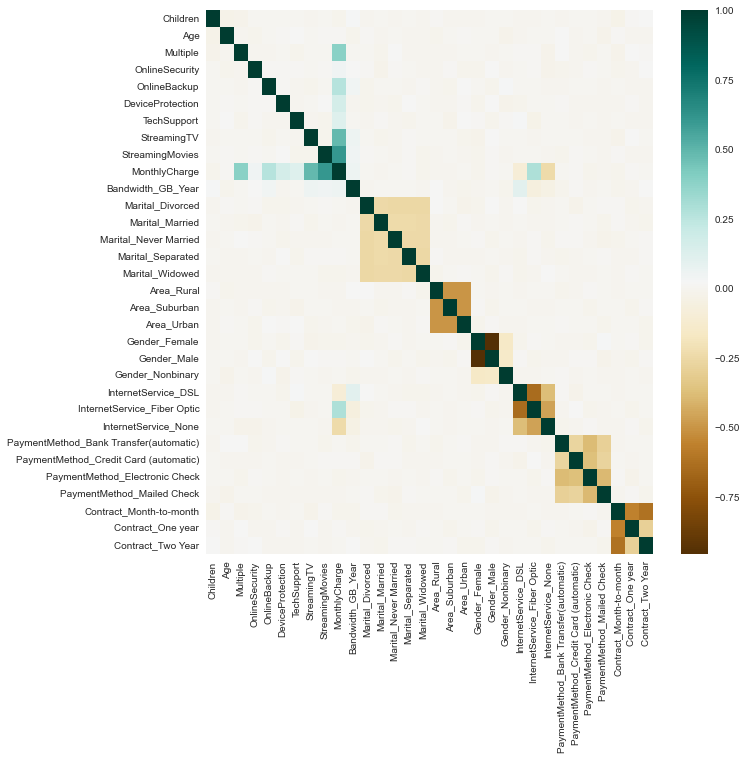

In [28]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(new_X.corr(), cmap='BrBG')
plt.show()

# 




The visualization above suggests that there may still be some correlation among the remaining variables. To address this issue, the next course of action is to perform a Variance Inflation Factor analysis to determine if multicollinearity exists.

In [29]:
# Reference: H1

v = pd.DataFrame()
v["Attribute"] = new_X.columns

v["Variance Inflation Fctor"] = [variance_inflation_factor(new_X.values, k)
                    for k in range(len(new_X.columns))]
print(v)

                                 Attribute  Variance Inflation Fctor
0                                 Children                  1.003037
1                                      Age                  1.003427
2                                 Multiple                  4.421346
3                           OnlineSecurity                  1.024112
4                             OnlineBackup                  2.636180
5                         DeviceProtection                  1.502414
6                              TechSupport                  1.481175
7                              StreamingTV                  6.763611
8                          StreamingMovies                  9.860645
9                            MonthlyCharge                 23.882272
10                       Bandwidth_GB_Year                  1.020632
11                        Marital_Divorced                       inf
12                         Marital_Married                       inf
13                   Marital_Never

# 




By looking at the analysis above, all attributes possessing an infinite VIF will be removed.




# 

In [30]:
new_X2 = new_X.loc[:, :'Bandwidth_GB_Year']

In [31]:
const_X3 = stats.add_constant(new_X2)

multi_reg = stats.OLS(y,const_X3)
model_c = multi_reg.fit()
model_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.093e+05
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        06:20:51   Log-Likelihood:                -22945.
No. Observations:               10000   AIC:                         4.591e+04
Df Residuals:                    9988   BIC:                         4.600e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -6.2510      0.167    -37.355      0.000      -6.579      -5.923
Children             -0.3700      0.011    -33.042      0.000      -0.392      -0.348
Age                   0.0400      0.001     34.454      0.000       0.038       0.042
Multiple             -1.9521      0.070    -28.054      0.000      -2.088      -1.816
OnlineSecurity       -1.0307      0.050    -20.461      0.000      -1.129      -0.932
OnlineBackup         -1.8233      0.059    -30.736      0.000      -1.940      -1.707
DeviceProtection     -1.4045      0.052    -26.969      0.000      -1.507      -1.302
TechSupport          -0.5346      0.053    -10.113      0.000      -0.638      -0.431
StreamingTV          -4.0905      0.080    -51.108      0.000      -4.247      -3.934
StreamingMovies      -4.1842      0.093    -44.969      0.000      -4.367      -4.002
MonthlyCharge         0.0311      0.002     20.476      0.000       0.028       0.034
Bandwidth_GB_Year     0.0121    1.1e-05   1095.444      0.000       0.012       0.012
==============================================================================
Omnibus:                    21984.491   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1054.973
Skew:                          -0.476   Prob(JB):                    8.23e-230
Kurtosis:                       1.724   Cond. No.                     3.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
v_2 = pd.DataFrame()
v_2["Attribute"] = new_X2.columns

v_2["Variance Inflation Fctor"] = [variance_inflation_factor(new_X2.values, k)
                    for k in range(len(new_X2.columns))]
print(v_2)

            Attribute  Variance Inflation Fctor
0            Children                  1.906260
1                 Age                  6.559631
2            Multiple                  2.919556
3      OnlineSecurity                  1.572227
4        OnlineBackup                  2.358184
5    DeviceProtection                  1.986085
6         TechSupport                  1.757505
7         StreamingTV                  3.674021
8     StreamingMovies                  4.379839
9       MonthlyCharge                 41.991728
10  Bandwidth_GB_Year                  3.274175


# 


By looking at the the above analysis, MonthlyCharge still has a relatively high VIF and as such should also be dropped.

In [33]:
new_X3 = new_X2.drop('MonthlyCharge', axis = 1)

# 




# D3. REDUCED LINEAR REGRESSION MODEL

In [34]:
const_X4 = stats.add_constant(new_X3)

multi_reg = stats.OLS(y,const_X4)
model_d = multi_reg.fit()
model_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.153e+05
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        06:20:52   Log-Likelihood:                -23151.
No. Observations:               10000   AIC:                         4.632e+04
Df Residuals:                    9989   BIC:                         4.640e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.4493      0.098    -35.076      0.000      -3.642      -3.257
Children             -0.3705      0.011    -32.418      0.000      -0.393      -0.348
Age                   0.0401      0.001     33.832      0.000       0.038       0.042
Multiple             -0.9245      0.049    -18.790      0.000      -1.021      -0.828
OnlineSecurity       -0.9312      0.051    -18.197      0.000      -1.032      -0.831
OnlineBackup         -1.1187      0.049    -22.682      0.000      -1.215      -1.022
DeviceProtection     -1.0122      0.049    -20.477      0.000      -1.109      -0.915
TechSupport          -0.1620      0.051     -3.197      0.001      -0.261      -0.063
StreamingTV          -2.7809      0.049    -56.617      0.000      -2.877      -2.685
StreamingMovies      -2.5535      0.049    -51.988      0.000      -2.650      -2.457
Bandwidth_GB_Year     0.0121   1.13e-05   1073.017      0.000       0.012       0.012
==============================================================================
Omnibus:                    87039.825   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1421.474
Skew:                          -0.594   Prob(JB):                    2.14e-309
Kurtosis:                       1.586   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
v_3 = pd.DataFrame()
v_3["Attribute"] = new_X3.columns

v_3["Variance Inflation Fctor"] = [variance_inflation_factor(new_X3.values, k)
                    for k in range(len(new_X3.columns))]
print(v_3)

           Attribute  Variance Inflation Fctor
0           Children                  1.821967
1                Age                  4.426628
2           Multiple                  1.751587
3     OnlineSecurity                  1.510573
4       OnlineBackup                  1.745413
5   DeviceProtection                  1.709496
6        TechSupport                  1.544971
7        StreamingTV                  1.872978
8    StreamingMovies                  1.869942
9  Bandwidth_GB_Year                  3.008513


# 



Based on the above analysis, although the R squared value is no longer at 1, it is still very high at 0.991. Despite this, the p-values for all variables are less than 0.05, and the Variance Inflation Factor (VIF) values are relatively low, all being less than 5. Therefore, the process of reducing variables ends at this point.




# 

In [36]:
print ("There final model consists of", new_X3.shape[1], "Independent attributes.")

There final model consists of 10 Independent attributes.


# 










# E1. MODEL COMPARISON

The initial model consisted of 55 predictor attributes, which resulted in an inflated R-squared value of 1 due to the presence of several features. In order to improve the model, I examined the significance of each feature by exploring the model summary and observing their p-values, and subsequently removed some of the features. After this process, I assessed multicollinearity, which occurs when certain features act similarly and can be problematic for predictions, as they are not truly independent of each other. I used variance inflation factors (VIF) to obtain the attributes that were influenced by all other attributes, and eliminated the ones with VIF scores that were either infinite or higher than the ideal value of 5.

As a result, the final model consisted of only 10 attributes, and had an R-squared value of 0.991, which means that the model explains approximately 99.1% of the variation in the sample values of the tenure of a customer. Although this value is slightly lower than the initial model's R-squared value of 1, the equation would be a better clarification of how well the model would perform when answering the research question.

In [37]:
print("The initial model has an R squared value of ", round(model_a.rsquared, 3))

The initial model has an R squared value of  1.0


In [38]:
print("The final model has an R squared value of ", round(model_d.rsquared, 3))

The final model has an R squared value of  0.991


#  











# E2. OUTPUT AND CALCULATIONS

The residuals are visualized in two plots. The first plot compares the actual values from the dataset against the predicted values from the model to see how much variance is in the model. The plotted line labeled "best fit" can be analyzed against the 45-degree line labeled "identity", where the prediction accurately matches the model. The similarity between the two suggests that the final model still predicts very accurately. The second residuals plot shows the error of prediction, with points randomly distributed on both sides of the axis.

In [39]:
# Run Train_Test_Split on processed data
 
X_train, X_test, y_train, y_test = train_test_split(new_X3, y, test_size=0.3, random_state=1)

In [40]:
lasso_reg = Lasso()

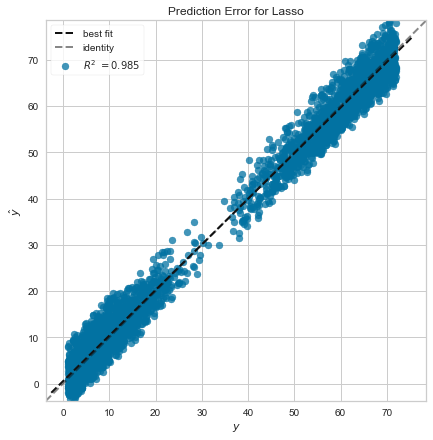

In [41]:
mpl.rcParams['figure.figsize'] = (7,7)
vis = PredictionError(lasso_reg) 
vis.fit(X_train, y_train) 
vis.score(X_test, y_test) 

pf = vis.poof()

In [42]:
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)

residuals = y_test - y_pred
std_residual = np.std(residuals)

print("The model's residual standard error is ", round(std_residual, 2))

The model's residual standard error is  3.26


In [43]:
ridge_reg = Ridge()

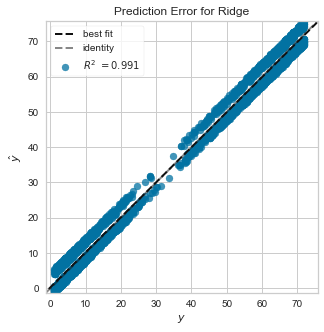

In [44]:
mpl.rcParams['figure.figsize'] = (10,5)
vis = PredictionError(ridge_reg) 
vis.fit(X_train, y_train) 
vis.score(X_test, y_test) 

pf = vis.poof()

In [45]:
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

residuals = y_test - y_pred
std_residual = np.std(residuals)

print("The model's residual standard error is ", round(std_residual, 2))

The model's residual standard error is  2.45


#  










# E3. CODE
All code used in the implementation of these regression models have also been documented during the experiment and presented above

#   












# F1. RESULTS

In [46]:
model_final = LinearRegression() 
model_final.fit(new_X3, y)

coef = pd.DataFrame(model_final.coef_.round(decimals = 2), new_X3.columns, columns = ['Coefficient']) 
coef['Attribute'] = coef.index

In [47]:
# Regression Equation    
    
eqn = 'y = '
y1 = model_final.intercept_.round(decimals = 2)

eqn += str(y1)

for idx, row in coef.iterrows():
    if row['Coefficient'] < 0:
        c = str(row.Coefficient)
        eqn += c + '(' + row['Attribute'] + ')'
    else:
        c = str(row.Coefficient)
        eqn += '+' + c + '(' + row['Attribute'] + ')'
print(eqn)

y = -3.45-0.37(Children)+0.04(Age)-0.92(Multiple)-0.93(OnlineSecurity)-1.12(OnlineBackup)-1.01(DeviceProtection)-0.16(TechSupport)-2.78(StreamingTV)-2.55(StreamingMovies)+0.01(Bandwidth_GB_Year)


- The final regression model equation is given as follows:

y = -3.45-0.37(Children)+0.04(Age)-0.92(Multiple)-0.93(OnlineSecurity)-1.12(OnlineBackup)-1.01(DeviceProtection)-
0.16(TechSupport)-2.78(StreamingTV)-2.55(StreamingMovies)+0.01(Bandwidth_GB_Year).

- Interpretation of the coefficients of the reduced model: Here, the dependent attribute in this equation is Tenure, and its value is -3.45 when all the independent attributes are equal to zero. The coefficients of the predictor attributes describe the estimated change in the response attribute if all the other attributes remain constant. 

- Statistical and practical significance of the reduced model: This model is precise and well-suited for predicting customer tenure and identifying ways to reduce customer churn. The model has low p-values and VIF, indicating good performance. 

- Limitation of the model: The model's limitation is that it still has a high condition number, indicating the possibility of strong multicollinearity or other numerical problems.

# 







# F2. RECOMMENDATIONS
In my opinion, network companies should prioritize enhancing their security and tech support to ensure that customers have confidence in using their services. Additionally, they should concentrate on offering high-quality streaming content and establishing incentive programs for customers who consume a significant amount of bandwidth. Implementing these strategies could potentially lead to increased customer retention rates.

#   

















#  G. PANOPTO DEMONSTRATION

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=266b588f-f25c-4b5a-802b-afeb00d0c97a 

#   












#  H. SOURCES OF THIRD-PARTY CODE

1. https://analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
2. https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe/51672855
3. https://datatofish.com/export-dataframe-to-excel/
4. https://datascience.stackexchange.com/questions/84840/how-to-create-multiple-subplots-scatterplot-in-for-loop
5. https://seaborn.pydata.org/tutorial/distributions.html
6. https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python 






# 















# I. SOURCES
1. Shubham Agrawal (August 13, 2018). P value and R squared. Retrieved November 4, 2021, from https://www.rpubs.com/shubh2565/pvalue-rsquared

2. Massaron, L., & Boschetti, A. (2016). Regression analysis with Python. Packt Publishing. ISBN: 9781785286315. 

3. Sigma Coding. (2019, April 27). Multiple Regression Analysis in Python | Part 2 [Video]. YouTube. https://www.youtube.com/watch?v=8DhvVs59It4 (https://www.youtube.com/watch?v=8DhvVs59It4)